# Exploratory Analysis of Populace Health and Recommendation 

![](global_health.jpg)

## Table of Contents 

1. Introduction 
2. Data Acquisition 
3. Data Cleaning 
    - 3.1 Demographic Data Cleaning 
    - 3.2 Diet Data Cleaning 
    - 3.3 Examination Data Cleaning 
    - 3.4 Lab Results Data Exploration and Cleaning Analysis 
    - 3.5 Goods Basket Data Cleaning 
    - 3.6 Medication Data Cleaning 
    - 3.7 Questionnaire Data Cleaning 
    - 3.8 Commodity Price Data Cleaning 
    - 3.9 Additional Cleaning 
4. Exploratory Data Analysis 
    - 4.1 Metabolic Panel 
    - 4.2 Demographics and Questionnaire 
    - 4.3 Medication 
5. Model Creation and Fine Turning 
    - 5.1 Data Standardization 
    - 5.2 Fair Health Modeling 
        - 5.2.1 Testing the model 
    - 5.3 Good Health Modling 
        - 5.3.1 Testing the model 
    - 5.4 Dendogram
6. Recommender System 
    - 6.1 Methods Definition 
    - 6.2 Testing the Recommender
7. Summary 
    - 7.1 Quantifiable Results 
    - 7.2 Next Steps 

## 1. Introduction

Individualizing nutritional advice for a unique person is quite difficult in 2020. There are a multitude of downloadable applications, web services and personal trainers that offer advice, but this information is based on the average populace. Also there is an innate assumption that a person can either afford a nutitional coach, or has the access to mobile applications and web services. According to Statista only 45% of the world has access to a smartphone; and World Bank has reported that 10% of the global population lives below the international poverty line. Unfortunately, health afflictions are indiscriminate of smartphone access and more incline to those without access to proper nutritional supplements. If an individual receives medical advice, notifying them of definicts in macro nurtrients, they are prescribed different foods that can increase those nutrients; regardless of the accessibility, income level, and market value of that good. This project proposes to build a recommendation stystem that takes into account several factors (including individual health) and provide suggestions to improve the quality of a persons eating habit/nutritional deficit. 

   - Objective: Create a model that provides nutritional deficit individuals with dietary suggestions based on environment and cost. 

In [162]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 

from scipy import stats
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import bartlett,levene 
from sklearn import metrics as metrics
from sklearn.metrics import accuracy_score, precision_score

## 2. Data Acquistion 

The data sources are an aggregation of medical history, demographics, questionnaires, lab results, medical prescriptions, etc, that isn’t personalized and it doesn’t contain Personal Identifying Information (PII). The nutritional information data set was aggregated through web crawling websites, and data repositories such as Open Food Facts, National Center for Health Statistics (NCHS) , Nutritional Health and Nutrion Examination, and World Food Program (WFP). 

In [10]:
demographic_df = pd.read_csv('demographic.csv', header=0)
diet_df = pd.read_csv('diet.csv', header=0)
examination_df = pd.read_csv('examination.csv', header=0)
labs_pd = pd.read_csv('labs.csv', header=0)
basket_df = pd.read_csv('Market_Basket_Optimisation.csv', header=0)
meds_df = pd.read_csv('medications.csv', header=0 )
questionnaire_df = pd.read_csv('questionnaire.csv', header=0)
prices_df = pd.read_csv('wfp_market_food_prices.csv', header=0)

## 3. Data Cleaning

There is a lot of inconsistency between the columns of data and rows of missing data. Using dropna() to remove all the missing data led to an entirely empty data set, thus highlight the crucial rows to build a data frame with the pertinent information was crucial. The process was iterative and required understanding the coding nomenclature for data point provided by NCHS.

### 3.1 Demographic Data Cleaning 

In [11]:
demographic_df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


In [12]:
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Data columns (total 47 columns):
SEQN        10175 non-null int64
SDDSRVYR    10175 non-null int64
RIDSTATR    10175 non-null int64
RIAGENDR    10175 non-null int64
RIDAGEYR    10175 non-null int64
RIDAGEMN    673 non-null float64
RIDRETH1    10175 non-null int64
RIDRETH3    10175 non-null int64
RIDEXMON    9813 non-null float64
RIDEXAGM    4213 non-null float64
DMQMILIZ    6261 non-null float64
DMQADFC     543 non-null float64
DMDBORN4    10175 non-null int64
DMDCITZN    10171 non-null float64
DMDYRSUS    1908 non-null float64
DMDEDUC3    2803 non-null float64
DMDEDUC2    5769 non-null float64
DMDMARTL    5769 non-null float64
RIDEXPRG    1309 non-null float64
SIALANG     10175 non-null int64
SIAPROXY    10174 non-null float64
SIAINTRP    10175 non-null int64
FIALANG     10054 non-null float64
FIAPROXY    10054 non-null float64
FIAINTRP    10054 non-null float64
MIALANG     7311 non-null float64
MIAPROXY    73

In [13]:
total_missing = demographic_df.isnull().sum().sort_values(ascending=False)
percent_missing = (demographic_df.isnull().sum()/demographic_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
DMQADFC,9632,0.946634
RIDAGEMN,9502,0.933857
RIDEXPRG,8866,0.871351
DMDYRSUS,8267,0.812482
DMDEDUC3,7372,0.724521


### 3.2 Diet Data Cleaning

In [14]:
diet_df.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0


In [15]:
diet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Columns: 168 entries, SEQN to DRD370V
dtypes: float64(166), int64(2)
memory usage: 12.6 MB


In [16]:
total_missing = diet_df.isnull().sum().sort_values(ascending=False)
percent_missing = (diet_df.isnull().sum()/diet_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
DRQSDT5,9813,1.000000
DRQSDT6,9809,0.999592
DRQSDT12,9805,0.999185
DRD370PQ,9803,0.998981
DRD370JQ,9801,0.998777


### 3.3 Examination Data Cleaning

In [17]:
examination_df.head()

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
2,73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,...,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0
3,73560,1,803.0,NaN,NaN,1.0,2.0,64.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1,949.0,NaN,NaN,1.0,3.0,92.0,1.0,1.0,...,3.0,1.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0


In [18]:
examination_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Columns: 224 entries, SEQN to CSAEFFRT
dtypes: float64(192), int64(3), object(29)
memory usage: 15.7+ MB


In [19]:
total_missing = examination_df.isnull().sum().sort_values(ascending=False)
percent_missing = (examination_df.isnull().sum()/examination_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
BMIHEAD,9813,1.000000
BMIRECUM,9782,0.996841
CSQ260D,9739,0.992459
CSQ260I,9708,0.989300
OHX24CSC,9687,0.987160


### 3.4 Lab Results Data Cleaning

In [20]:
labs_pd.head()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1


In [21]:
labs_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Columns: 424 entries, SEQN to LBDB12SI
dtypes: float64(423), int64(1)
memory usage: 31.7 MB


In [22]:
total_missing = labs_pd.isnull().sum().sort_values(ascending=False)
percent_missing = (labs_pd.isnull().sum()/labs_pd.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
LBXEMA,9779,0.996535
PHAANTHR,9776,0.996229
PHAANTMN,9776,0.996229
PHAALCHR,9771,0.995720
PHAALCMN,9771,0.995720


### 3.5 Goods Basket Data Cleaning

In [23]:
basket_df.head() 

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
basket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
shrimp               7500 non-null object
almonds              5746 non-null object
avocado              4388 non-null object
vegetables mix       3344 non-null object
green grapes         2528 non-null object
whole weat flour     1863 non-null object
yams                 1368 non-null object
cottage cheese       980 non-null object
energy drink         653 non-null object
tomato juice         394 non-null object
low fat yogurt       255 non-null object
green tea            153 non-null object
honey                86 non-null object
salad                46 non-null object
mineral water        24 non-null object
salmon               7 non-null object
antioxydant juice    3 non-null object
frozen smoothie      3 non-null object
spinach              2 non-null object
olive oil            0 non-null float64
dtypes: float64(1), object(19)
memory usage: 615.3+ KB


In [25]:
total_missing = basket_df.isnull().sum().sort_values(ascending=False)
percent_missing = (basket_df.isnull().sum()/basket_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
olive oil,7500,1.000000
spinach,7498,0.999733
frozen smoothie,7497,0.999600
antioxydant juice,7497,0.999600
salmon,7493,0.999067


### 3.6 Medications Data Cleaning

In [26]:
meds_df.head() 

,SEQN,RXDUSE,RXDDRUG,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT
0,73557,1,99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,73557,1,INSULIN,d00262,2.0,1460.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,2.0
2,73558,1,GABAPENTIN,d03182,1.0,243.0,G25.81,NaN,NaN,Restless legs syndrome,NaN,NaN,4.0
3,73558,1,INSULIN GLARGINE,d04538,1.0,365.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,4.0
4,73558,1,OLMESARTAN,d04801,1.0,14.0,E11.2,NaN,NaN,Type 2 diabetes mellitus with kidney complicat...,NaN,NaN,4.0


In [27]:
meds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20194 entries, 0 to 20193
Data columns (total 13 columns):
SEQN        20194 non-null int64
RXDUSE      20194 non-null int64
RXDDRUG     14100 non-null object
RXDDRGID    14016 non-null object
RXQSEEN     14019 non-null float64
RXDDAYS     14018 non-null float64
RXDRSC1     14022 non-null object
RXDRSC2     714 non-null object
RXDRSC3     127 non-null object
RXDRSD1     13633 non-null object
RXDRSD2     714 non-null object
RXDRSD3     127 non-null object
RXDCOUNT    14100 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.4+ MB


In [28]:
total_missing = meds_df.isnull().sum().sort_values(ascending=False)
percent_missing = (meds_df.isnull().sum()/meds_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
RXDRSD3,20067,0.993711
RXDRSC3,20067,0.993711
RXDRSD2,19480,0.964643
RXDRSC2,19480,0.964643
RXDRSD1,6561,0.324898


### 3.7 Questionnare Data Cleaning

In [29]:
questionnaire_df.head() 

,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,1.0,NaN,NaN,NaN,NaN,1.0,NaN,7.0,1.0,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN


In [30]:
questionnaire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Columns: 953 entries, SEQN to WHQ520
dtypes: float64(944), int64(7), object(2)
memory usage: 73.9+ MB


In [31]:
total_missing = questionnaire_df.isnull().sum().sort_values(ascending=False)
percent_missing = (questionnaire_df.isnull().sum()/questionnaire_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
MCQ240I,10175,1.000000
MCQ240R,10175,1.000000
SMQ690J,10175,1.000000
SMQ861,10175,1.000000
MCQ240V,10174,0.999902


### 3.8 Commodity Prices Data Cleaning

In [32]:
prices_df.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP


In [33]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743914 entries, 0 to 743913
Data columns (total 18 columns):
adm0_id               743914 non-null int64
adm0_name             743914 non-null object
adm1_id               743914 non-null int64
adm1_name             729965 non-null object
mkt_id                743914 non-null int64
mkt_name              743914 non-null object
cm_id                 743914 non-null int64
cm_name               743914 non-null object
cur_id                743914 non-null int64
cur_name              743914 non-null object
pt_id                 743914 non-null int64
pt_name               743914 non-null object
um_id                 743914 non-null int64
um_name               743914 non-null object
mp_month              743914 non-null int64
mp_year               743914 non-null int64
mp_price              743914 non-null float64
mp_commoditysource    743914 non-null object
dtypes: float64(1), int64(9), object(8)
memory usage: 79.5+ MB


In [34]:
total_missing = prices_df.isnull().sum().sort_values(ascending=False)
percent_missing = (prices_df.isnull().sum()/prices_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
adm1_name,13949,0.018751
mp_commoditysource,0,0.000000
mp_price,0,0.000000
adm0_name,0,0.000000
adm1_id,0,0.000000


### 3.9 Additional Cleaning 

The additional data cleaning required creating a basket of goods for a developing country.  The Guinean basket of goods serves as an example of a user in developing country wanting to understand what goods are available in their city, and at what price. 

In [35]:
# Retrieving only Guinea prices for goods 

headers = prices_df.columns
guinea_prices = pd.DataFrame(columns=headers)
count = 0

for i in prices_df.adm0_name:
    
        if (prices_df.adm0_name [count] =='Guinea') and (prices_df.adm1_name [count] == 'Conakry'):
            print(prices_df[:] [count:])
            #guinea_prices = guinea_prices.append(prices_df[:] [count:])            
            
        count = count + 1

        adm0_id    adm0_name  adm1_id          adm1_name  mkt_id mkt_name  \
147811      106       Guinea    40701            Conakry     354  Yeguema   
147812      106       Guinea    40701            Conakry     354  Yeguema   
147813      106       Guinea    40701            Conakry     354  Yeguema   
147814      106       Guinea    40701            Conakry     354  Yeguema   
147815      106       Guinea    40701            Conakry     354  Yeguema   
147816      106       Guinea    40701            Conakry     354  Yeguema   
147817      106       Guinea    40701            Conakry     354  Yeguema   
147818      106       Guinea    40701            Conakry     354  Yeguema   
147819      106       Guinea    40701            Conakry     354  Yeguema   
147820      106       Guinea    40701            Conakry     354  Yeguema   
147821      106       Guinea    40701            Conakry     354  Yeguema   
147822      106       Guinea    40701            Conakry     354  Yeguema   

        adm0_id    adm0_name  adm1_id          adm1_name  mkt_id mkt_name  \
147821      106       Guinea    40701            Conakry     354  Yeguema   
147822      106       Guinea    40701            Conakry     354  Yeguema   
147823      106       Guinea    40701            Conakry     354  Yeguema   
147824      106       Guinea    40701            Conakry     354  Yeguema   
147825      106       Guinea    40701            Conakry     354  Yeguema   
147826      106       Guinea    40701            Conakry     354  Yeguema   
147827      106       Guinea    40701            Conakry     354  Yeguema   
147828      106       Guinea    40701            Conakry     354  Yeguema   
147829      106       Guinea    40701            Conakry     354  Yeguema   
147830      106       Guinea    40701            Conakry     354  Yeguema   
147831      106       Guinea    40701            Conakry     354  Yeguema   
147832      106       Guinea    40701            Conakry     354  Yeguema   

[596084 rows x 18 columns]
        adm0_id    adm0_name  adm1_id          adm1_name  mkt_id mkt_name  \
147831      106       Guinea    40701            Conakry     354  Yeguema   
147832      106       Guinea    40701            Conakry     354  Yeguema   
147833      106       Guinea    40701            Conakry     354  Yeguema   
147834      106       Guinea    40701            Conakry     354  Yeguema   
147835      106       Guinea    40701            Conakry     354  Yeguema   
147836      106       Guinea    40701            Conakry     354  Yeguema   
147837      106       Guinea    40701            Conakry     354  Yeguema   
147838      106       Guinea    40701            Conakry     354  Yeguema   
147839      106       Guinea    40701            Conakry     354  Yeguema   
147840      106       Guinea    40701            Conakry     354  Yeguema   
147841      106       Guinea    40701            Conakry     354  Yeguema   
147842      106       Guinea    40701            

        adm0_id    adm0_name  adm1_id          adm1_name  mkt_id mkt_name  \
147837      106       Guinea    40701            Conakry     354  Yeguema   
147838      106       Guinea    40701            Conakry     354  Yeguema   
147839      106       Guinea    40701            Conakry     354  Yeguema   
147840      106       Guinea    40701            Conakry     354  Yeguema   
147841      106       Guinea    40701            Conakry     354  Yeguema   
147842      106       Guinea    40701            Conakry     354  Yeguema   
147843      106       Guinea    40701            Conakry     354  Yeguema   
147844      106       Guinea    40701            Conakry     354  Yeguema   
147845      106       Guinea    40701            Conakry     354  Yeguema   
147846      106       Guinea    40701            Conakry     354  Yeguema   
147847      106       Guinea    40701            Conakry     354  Yeguema   
147848      106       Guinea    40701            Conakry     354  Yeguema   

[596071 rows x 18 columns]
        adm0_id    adm0_name  adm1_id          adm1_name  mkt_id mkt_name  \
147844      106       Guinea    40701            Conakry     354  Yeguema   
147845      106       Guinea    40701            Conakry     354  Yeguema   
147846      106       Guinea    40701            Conakry     354  Yeguema   
147847      106       Guinea    40701            Conakry     354  Yeguema   
147848      106       Guinea    40701            Conakry     354  Yeguema   
147849      106       Guinea    40701            Conakry     354  Yeguema   
147850      106       Guinea    40701            Conakry     354  Yeguema   
147851      106       Guinea    40701            Conakry     354  Yeguema   
147852      106       Guinea    40701            Conakry     354  Yeguema   
147853      106       Guinea    40701            Conakry     354  Yeguema   
147854      106       Guinea    40701            Conakry     354  Yeguema   
147855      106       Guinea    40701            

        adm0_id    adm0_name  adm1_id          adm1_name  mkt_id mkt_name  \
147852      106       Guinea    40701            Conakry     354  Yeguema   
147853      106       Guinea    40701            Conakry     354  Yeguema   
147854      106       Guinea    40701            Conakry     354  Yeguema   
147855      106       Guinea    40701            Conakry     354  Yeguema   
147856      106       Guinea    40701            Conakry     354  Yeguema   
147857      106       Guinea    40701            Conakry     354  Yeguema   
147858      106       Guinea    40701            Conakry     354  Yeguema   
147859      106       Guinea    40701            Conakry     354  Yeguema   
147860      106       Guinea    40701            Conakry     354  Yeguema   
147861      106       Guinea    40701            Conakry     354  Yeguema   
147862      106       Guinea    40701            Conakry     354  Yeguema   
147863      106       Guinea    40701            Conakry     354  Yeguema   

        adm0_id    adm0_name  adm1_id          adm1_name  mkt_id mkt_name  \
147860      106       Guinea    40701            Conakry     354  Yeguema   
147861      106       Guinea    40701            Conakry     354  Yeguema   
147862      106       Guinea    40701            Conakry     354  Yeguema   
147863      106       Guinea    40701            Conakry     354  Yeguema   
147864      106       Guinea    40701            Conakry     354  Yeguema   
147865      106       Guinea    40701            Conakry     354  Yeguema   
147866      106       Guinea    40701            Conakry     354  Yeguema   
147867      106       Guinea    40701            Conakry     354  Yeguema   
147868      106       Guinea    40701            Conakry     354  Yeguema   
147869      106       Guinea    40701            Conakry     354  Yeguema   
147870      106       Guinea    40701            Conakry     354  Yeguema   
147871      106       Guinea    40701            Conakry     354  Yeguema   

[596048 rows x 18 columns]
        adm0_id    adm0_name  adm1_id          adm1_name  mkt_id mkt_name  \
147867      106       Guinea    40701            Conakry     354  Yeguema   
147868      106       Guinea    40701            Conakry     354  Yeguema   
147869      106       Guinea    40701            Conakry     354  Yeguema   
147870      106       Guinea    40701            Conakry     354  Yeguema   
147871      106       Guinea    40701            Conakry     354  Yeguema   
147872      106       Guinea    40701            Conakry     354  Yeguema   
147873      106       Guinea    40701            Conakry     354  Yeguema   
147874      106       Guinea    40701            Conakry     354  Yeguema   
147875      106       Guinea    40703             Kankan     357   Dibida   
147876      106       Guinea    40703             Kankan     357   Dibida   
147877      106       Guinea    40703             Kankan     357   Dibida   
147878      106       Guinea    40703            

[596040 rows x 18 columns]


In [96]:
#Guniean Price Basket 

data =[['alkaline','Lettuce',20],['albumin','Eggs',80],['alt','Oil (Palm)',54],['ast','Sorghum (white)',47],['bun','Fish',35]
        ,['calcium','Rice (local)',5],['chloride','Tomatoes',18],['creatininine','Onions',15],['glucose','Bread',33],['potassium','Spinach',20]
          ,['sodium','Beef',50],['bilirubin','Liver Damage',0],['protein','Beef',50]]

alb_food = pd.DataFrame(data, columns=['type','food','price'])

In [97]:
labs_pd.LBDSUASI.describe()

count    6551.000000
mean      318.209586
std        83.495760
min        41.600000
25%       255.800000
50%       309.300000
75%       368.800000
max       791.100000
Name: LBDSUASI, dtype: float64

## 4. Exploratory Data Analysis  

The first step to creating a predictive health model is determining and understanding what is quanitified as a healthy human being. Due to the numerous factors, there isn't one exact definition but there are guidelines and ranges. Using a physical as a starting point thats used to identify sick individuals, this capstone decided to look at the most common medical tests requested by a doctor to determine health, and look at the rubric of "good health" set by those tests. Before looking at the rubric for each test, we need to identify the test and their purpose: 

- Albumin- helps keep fluid in your bloodstream so it doesn't leak into other tissues 

- Alkaline - can indicate metabolic alkatoisis; when the pH tissue is elevated beyond the normal range 

- Alt - measures the amount of this enzyme in the blood 

- Ast - indicator of liver, heart, and/or kidney damage

- Bun - measures the leve or urea nitrogen in the blood 

- Calcium - measures the amount of calcium in the blood 

- Chloride - indicator for kidney disease, heart failure, liver disease and high blood pressure 

- Creatininine - a waste product produced by muscles and an indicator for kidney functionality 

- Glucose - Measures sugar level in your blood and an indicator for kidney and liver function 

- Potassium - helps the nerves and muscles "talk" to each other and a prime indicaor for heart function and kidney disease 

- Sodium - an indicator of kidney health 

- Bilirubin - a substance found in bile and form after red blood cells break down 

- Protien - an indicator for the potential of a possible disease 

### Metabolic Panel 

Creating a dataframe based on the metabolic panel tests completed during a physical. The test results are aggregated into one data frame 

In [40]:
metabolic_panel = pd.DataFrame()

# Metabolic_panel ID is aded after scaling and normalizing the data 
# because the ID is independent of the data set, and only used 
# in reference to the other data sets 
metabolic_panel ['ID'] = labs_pd.SEQN
metabolic_panel ['albumin'] = labs_pd.LBXSAL
metabolic_panel ['alkaline'] = labs_pd.LBXSAPSI
metabolic_panel ['alt'] = labs_pd.LBXSATSI
metabolic_panel ['ast'] = labs_pd.LBXSASSI
metabolic_panel ['bun'] = labs_pd.LBXSBU
metabolic_panel ['calcium'] = labs_pd.LBXSCA
metabolic_panel ['chloride'] = labs_pd.LBXSCLSI
metabolic_panel ['creatininine'] = labs_pd.LBXSCR
metabolic_panel ['glucose'] = labs_pd.LBXSGL
metabolic_panel ['potassium'] = labs_pd.LBXSKSI
metabolic_panel ['sodium'] = labs_pd.LBXSNASI
metabolic_panel ['bilirubin'] = labs_pd.LBXSTB
metabolic_panel ['protein'] = labs_pd.LBXSTP

### Demographic and Questionnaire 

To gain a better understanding and context for the metabolic panel, the questionnaire and demographic data needs to be connected to the metabolic panel. A healthy person(s) criteria considers several factors includeing age, sex, ethnicity, etc. Connecting additional pieces of information regarding spending habits regarding grocery and dining out, adds additional context to the data set. Within each parameter of the metabolic panel, certain conditions can be influenced based on gender, body mass index, etc. The conditions that this project take into account are clearly defined in section 8.2 Next Steps. 

In [41]:
metabolic_panel ['gender'] = demographic_df.RIDAGEYR
metabolic_panel ['age'] = demographic_df.RIDAGEYR
#metabolic_panel ['pregnancy'] = demographic_df.RIDEXPRG
metabolic_panel ['health'] = questionnaire_df.DBQ700
metabolic_panel ['grocery'] = questionnaire_df.CBD070
metabolic_panel ['non_grocery'] = questionnaire_df.CBD090
metabolic_panel ['eating_out'] = questionnaire_df.CBD120
metabolic_panel ['self_diagnose'] = questionnaire_df.HSD010

In [42]:
total_missing = metabolic_panel.isnull().sum().sort_values(ascending=False)
percent_missing = (metabolic_panel.isnull().sum()/metabolic_panel.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
health,3584,0.365230
self_diagnose,3578,0.364618
calcium,3302,0.336492
protein,3269,0.333130
bilirubin,3264,0.332620


In [43]:
metabolic_panel = metabolic_panel.dropna()

In [44]:
metabolic_panel.describe()

,ID,albumin,alkaline,alt,ast,bun,calcium,chloride,creatininine,glucose,...,sodium,bilirubin,protein,gender,age,health,grocery,non_grocery,eating_out,self_diagnose
count,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,...,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000
mean,78691.814764,4.284269,78.337296,23.610451,24.948300,12.896046,9.483412,104.297208,0.883785,101.560133,...,139.765552,0.639914,7.108239,45.604368,45.604368,2.948023,19078.076859,22002.097318,25368.265137,2.804534
std,2897.798508,0.340246,51.977287,15.423072,19.257321,6.286507,0.367493,2.747057,0.554211,37.613145,...,2.213144,0.321078,0.464109,19.454827,19.454827,1.003069,133989.776356,145435.220759,155567.606275,0.971782
min,73557.000000,2.700000,9.000000,6.000000,9.000000,1.000000,7.600000,83.000000,0.290000,49.000000,...,119.000000,0.100000,5.500000,16.000000,16.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,76204.000000,4.100000,53.000000,15.000000,19.000000,9.000000,9.200000,103.000000,0.690000,86.000000,...,139.000000,0.400000,6.800000,28.000000,28.000000,2.000000,200.000000,0.000000,30.000000,2.000000
50%,78785.000000,4.300000,66.000000,20.000000,22.000000,12.000000,9.500000,104.000000,0.820000,93.000000,...,140.000000,0.600000,7.100000,45.000000,45.000000,3.000000,400.000000,0.000000,100.000000,3.000000
75%,81153.000000,4.500000,83.000000,27.000000,27.000000,15.000000,9.700000,106.000000,0.990000,103.000000,...,141.000000,0.800000,7.400000,62.000000,62.000000,4.000000,600.000000,50.000000,200.000000,3.000000
max,83724.000000,5.600000,907.000000,317.000000,882.000000,95.000000,14.800000,115.000000,17.410000,568.000000,...,148.000000,7.100000,10.200000,80.000000,80.000000,5.000000,999999.000000,999999.000000,999999.000000,9.000000


In [45]:
metabolic_panel.corr()

,ID,albumin,alkaline,alt,ast,bun,calcium,chloride,creatininine,glucose,...,sodium,bilirubin,protein,gender,age,health,grocery,non_grocery,eating_out,self_diagnose
ID,1.000000,0.012801,-0.030854,-0.021094,-0.027410,-0.032005,-0.012174,-0.016162,-0.037886,-0.019812,...,-0.025721,-0.009019,-0.011912,-0.017672,-0.017672,0.011521,-0.020068,-0.026700,-0.006625,-0.024278
albumin,0.012801,1.000000,0.029594,0.076042,0.003822,-0.082102,0.506187,-0.155125,-0.085863,-0.157761,...,0.075493,0.195397,0.439853,0.004913,0.004913,-0.002477,0.005077,0.004643,-0.005058,-0.012815
alkaline,-0.030854,0.029594,1.000000,-0.009288,0.056400,-0.074133,0.138292,-0.006693,-0.073143,0.010051,...,0.024726,-0.009741,0.022901,-0.011610,-0.011610,0.020593,-0.006846,-0.010698,-0.000920,0.030411
alt,-0.021094,0.076042,-0.009288,1.000000,0.673653,-0.000101,0.041987,-0.068812,0.013054,0.087750,...,0.007159,0.073909,0.097793,-0.014260,-0.014260,0.032405,0.005415,0.000984,0.037599,0.028518
ast,-0.027410,0.003822,0.056400,0.673653,1.000000,-0.005653,0.011125,-0.076980,0.006200,0.018584,...,0.003894,0.064711,0.061710,0.002547,0.002547,0.025345,0.001360,-0.002900,0.097890,0.023636
bun,-0.032005,-0.082102,-0.074133,-0.000101,-0.005653,1.000000,-0.017098,-0.028669,0.576462,0.157109,...,0.051439,0.023223,-0.066919,0.002642,0.002642,0.003836,0.012649,0.013565,-0.003054,-0.016817
calcium,-0.012174,0.506187,0.138292,0.041987,0.011125,-0.017098,1.000000,-0.169395,-0.056400,-0.033152,...,0.148229,0.047843,0.361525,-0.002342,-0.002342,-0.004365,0.001048,0.000446,-0.021614,0.000288
chloride,-0.016162,-0.155125,-0.006693,-0.068812,-0.076980,-0.028669,-0.169395,1.000000,-0.068924,-0.233178,...,0.491132,-0.082504,-0.231892,0.011096,0.011096,0.011630,-0.003345,-0.007580,-0.001116,0.026222
creatininine,-0.037886,-0.085863,-0.073143,0.013054,0.006200,0.576462,-0.056400,-0.068924,1.000000,0.094966,...,0.056117,0.049545,-0.029587,-0.010424,-0.010424,0.000225,0.001723,0.000342,-0.007971,-0.017799
glucose,-0.019812,-0.157761,0.010051,0.087750,0.018584,0.157109,-0.033152,-0.233178,0.094966,1.000000,...,-0.195307,0.006979,-0.021780,-0.017446,-0.017446,0.018635,0.005403,0.005762,0.000444,0.008822


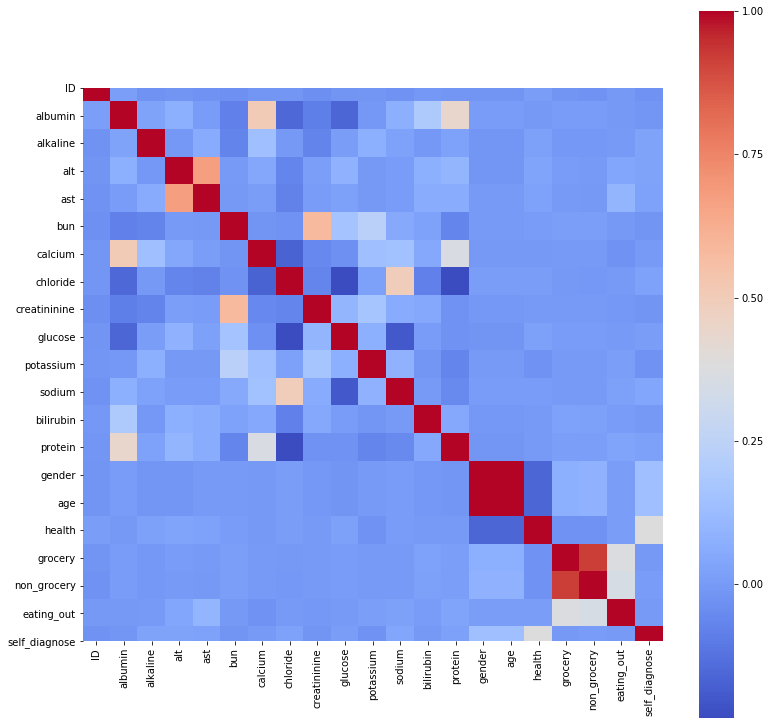

In [142]:
#Correlation Heatmap 
plt.figure()
sns.heatmap(metabolic_panel.corr(), square =True, annot = False, cmap='coolwarm')

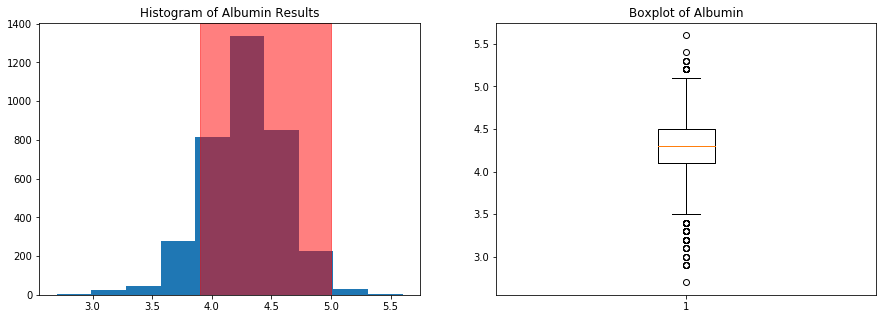

In [176]:
#Albumin Results
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(metabolic_panel.albumin)
plt.axvspan(3.9,5, color='red', alpha=.5)
#plt.axvspan(2,3.9, color='red', alpha=.5)
#lt.axvspan(5.1,7, color='red', alpha=.5)
plt.xlabel('')
plt.ylabel('')
plt.title('Histogram of Albumin Results')

plt.subplot(1,2,2)
plt.boxplot(metabolic_panel.albumin)
plt.xlabel('')
plt.ylabel('')
plt.title('Boxplot of Albumin')

plt.show()

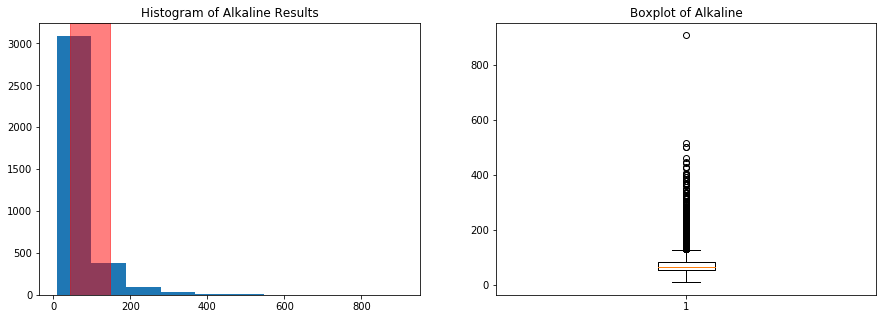

In [48]:
#Alkaline Results
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(metabolic_panel.alkaline)
plt.axvspan(44,147, color='red', alpha=.5)
plt.xlabel('')
plt.ylabel('')
plt.title('Histogram of Alkaline Results')

plt.subplot(1,2,2)
plt.boxplot(metabolic_panel.alkaline)
plt.xlabel('')
plt.ylabel('')
plt.title('Boxplot of Alkaline')

plt.show()

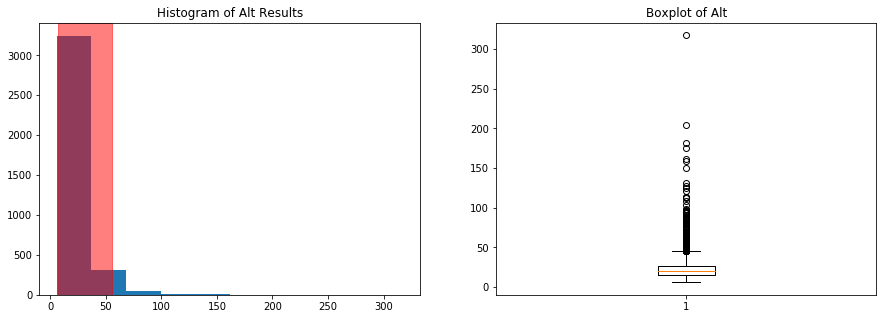

In [49]:
#Alt Results
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(metabolic_panel.alt)
plt.axvspan(7,56, color='red', alpha=.5)
plt.xlabel('')
plt.ylabel('')
plt.title('Histogram of Alt Results')

plt.subplot(1,2,2)
plt.boxplot(metabolic_panel.alt)
plt.xlabel('')
plt.ylabel('')
plt.title('Boxplot of Alt')

plt.show()

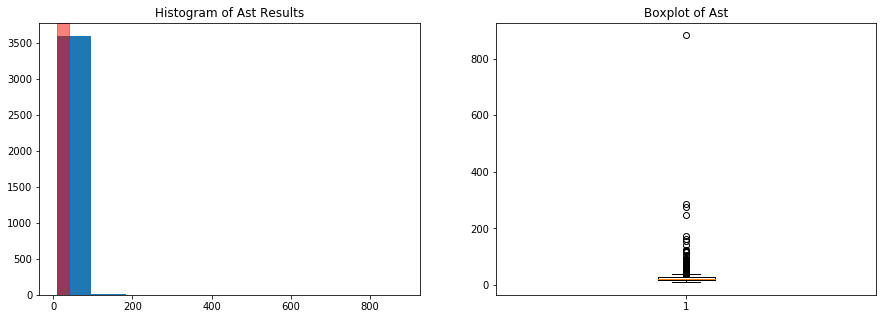

In [50]:
#Ast Results
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(metabolic_panel.ast)
plt.axvspan(10,40, color='red', alpha=.5)
plt.xlabel('')
plt.ylabel('')
plt.title('Histogram of Ast Results')

plt.subplot(1,2,2)
plt.boxplot(metabolic_panel.ast)
plt.xlabel('')
plt.ylabel('')
plt.title('Boxplot of Ast')

plt.show()

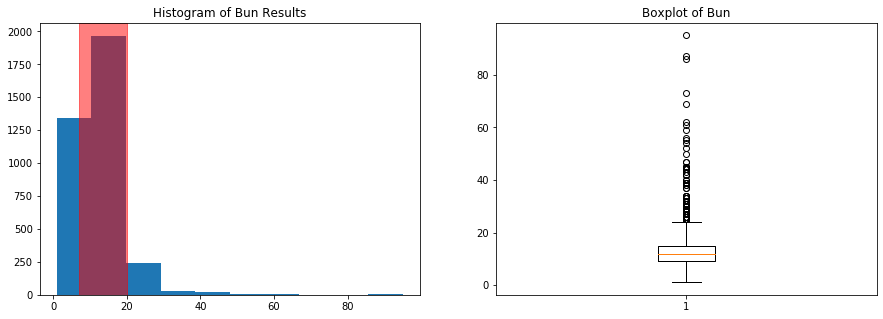

In [51]:
#Bun Results
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(metabolic_panel.bun)
plt.axvspan(7,20, color='red', alpha=.5)
plt.xlabel('')
plt.ylabel('')
plt.title('Histogram of Bun Results')

plt.subplot(1,2,2)
plt.boxplot(metabolic_panel.bun)
plt.xlabel('')
plt.ylabel('')
plt.title('Boxplot of Bun')

plt.show()

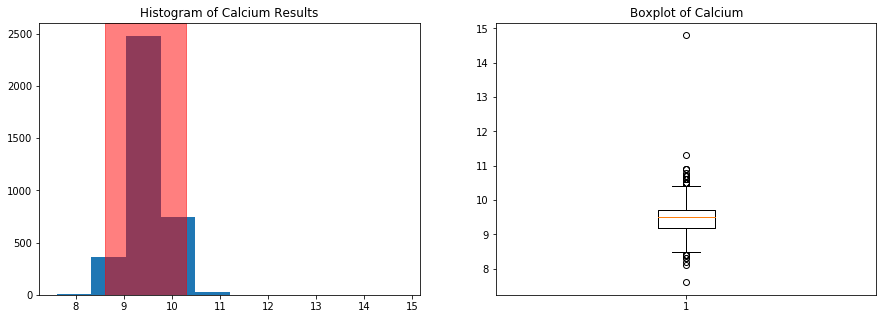

In [52]:
#Calcium Results
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(metabolic_panel.calcium)
plt.axvspan(8.6,10.3, color='red', alpha=.5)
plt.xlabel('')
plt.ylabel('')
plt.title('Histogram of Calcium Results')

plt.subplot(1,2,2)
plt.boxplot(metabolic_panel.calcium)
plt.xlabel('')
plt.ylabel('')
plt.title('Boxplot of Calcium')

plt.show()

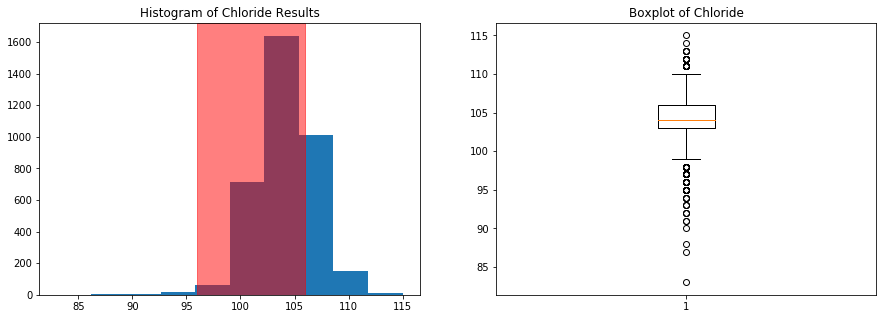

In [53]:
#Chloride Results
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(metabolic_panel.chloride)
plt.axvspan(96,106, color='red', alpha=.5)
plt.xlabel('')
plt.ylabel('')
plt.title('Histogram of Chloride Results')

plt.subplot(1,2,2)
plt.boxplot(metabolic_panel.chloride)
plt.xlabel('')
plt.ylabel('')
plt.title('Boxplot of Chloride')

plt.show()

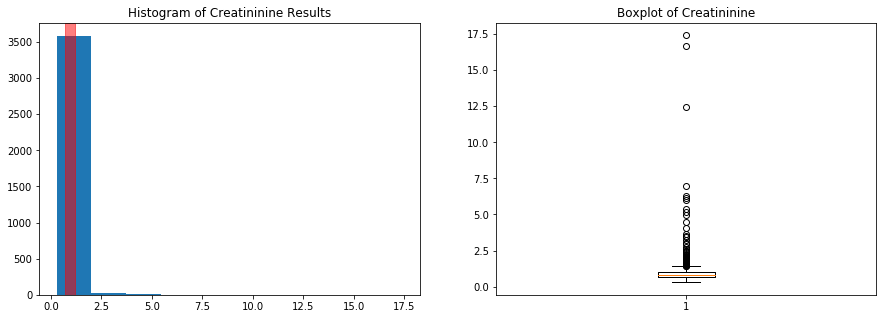

In [54]:
#Creatininine Results
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(metabolic_panel.creatininine)
plt.axvspan(.7,1.2, color='red', alpha=.5)
plt.xlabel('')
plt.ylabel('')
plt.title('Histogram of Creatininine Results')

plt.subplot(1,2,2)
plt.boxplot(metabolic_panel.creatininine)
plt.xlabel('')
plt.ylabel('')
plt.title('Boxplot of Creatininine')

plt.show()

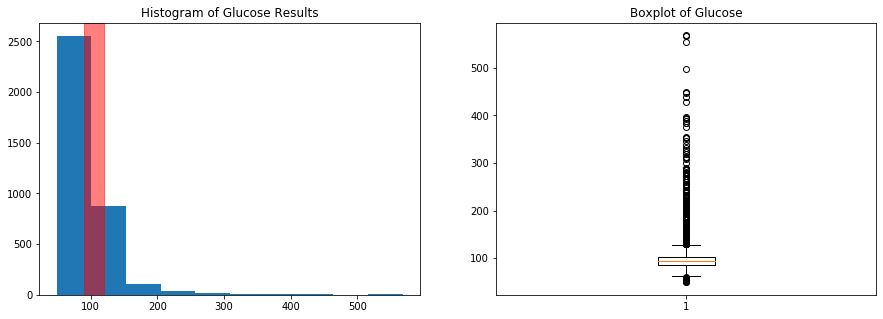

In [55]:
#Glucose Results
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(metabolic_panel.glucose)
plt.axvspan(90,120, color='red', alpha=.5)
plt.xlabel('')
plt.ylabel('')
plt.title('Histogram of Glucose Results')

plt.subplot(1,2,2)
plt.boxplot(metabolic_panel.glucose)
plt.xlabel('')
plt.ylabel('')
plt.title('Boxplot of Glucose')

plt.show()

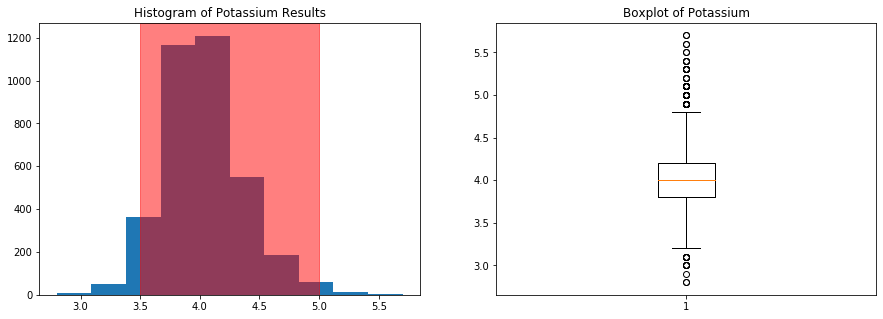

In [56]:
#Potassium Results
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(metabolic_panel.potassium)
plt.axvspan(3.5,5.0, color='red', alpha=.5)
plt.xlabel('')
plt.ylabel('')
plt.title('Histogram of Potassium Results')

plt.subplot(1,2,2)
plt.boxplot(metabolic_panel.potassium)
plt.xlabel('')
plt.ylabel('')
plt.title('Boxplot of Potassium')

plt.show()

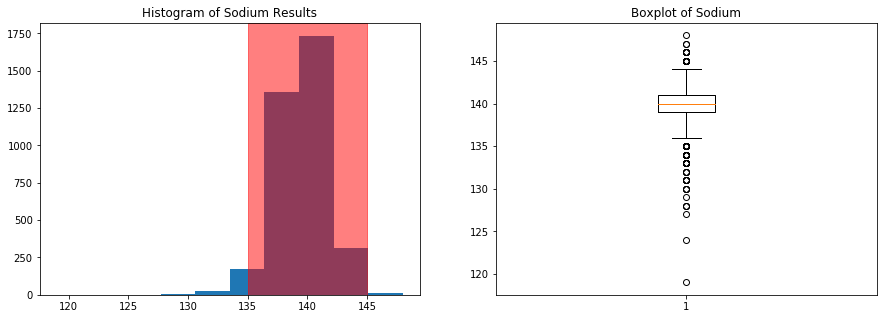

In [57]:
#Sodium Results
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(metabolic_panel.sodium)
plt.axvspan(135,145, color='red', alpha=.5)
plt.xlabel('')
plt.ylabel('')
plt.title('Histogram of Sodium Results')

plt.subplot(1,2,2)
plt.boxplot(metabolic_panel.sodium)
plt.xlabel('')
plt.ylabel('')
plt.title('Boxplot of Sodium')

plt.show()

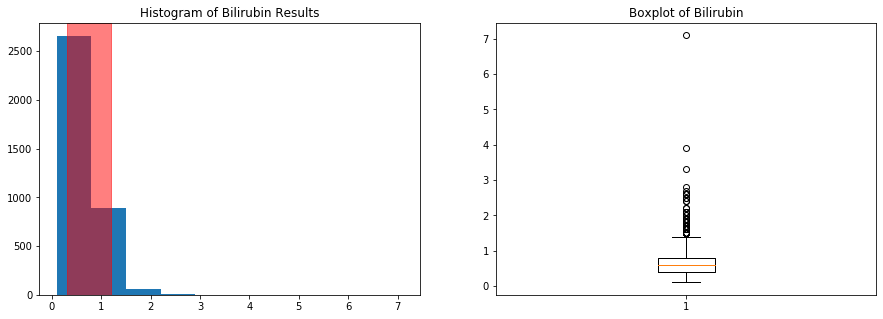

In [58]:
#Bilirubin Results
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(metabolic_panel.bilirubin)
plt.axvspan(.3,1.2, color='red', alpha=.5)
plt.xlabel('')
plt.ylabel('')
plt.title('Histogram of Bilirubin Results')

plt.subplot(1,2,2)
plt.boxplot(metabolic_panel.bilirubin)
plt.xlabel('')
plt.ylabel('')
plt.title('Boxplot of Bilirubin')

plt.show()

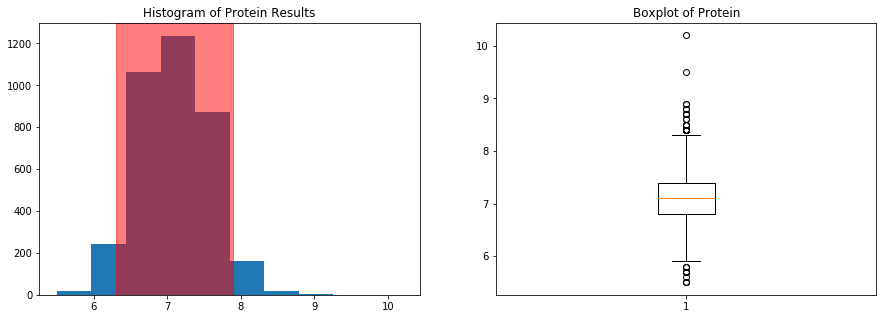

In [111]:
#Protein Results
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(metabolic_panel.protein)
plt.axvspan(6.3,7.9, color='red', alpha=.5)
#plt.axvspan(3,6.3, color='green', alpha=.5)
plt.xlabel('')
plt.ylabel('')
plt.title('Histogram of Protein Results')

plt.subplot(1,2,2)
plt.boxplot(metabolic_panel.protein)
plt.xlabel('')
plt.ylabel('')
plt.title('Boxplot of Protein')

plt.show()

The cleaned and analyzed data consisted of 3617 survey respondents, and theirs responses were aggregated into a histogram and boxplot. The histogram is able to show the aggregation of medical historys, visually depicting this information against a "health/good" range and a dangerous/at-risk range. Coupled with the boxplot, each component of the metabolic panel provides information regarding the outlier data, the weight of that data, and the quartile distribution of the survey respondents. 

##### Histogram 
The historgram of each test in the metabolic panel highlights several factors. These factors include: 
- The red zone highlights the number of respondents that fall within a healthy range for that metabolic range
- Respondents to the left of the red zone are individuals at a decifient, and individuals to the right are at risk of a surplus
- The historgram can also provide a visual understanding of wether the data is normalized or not. When looking at the data across all aspects of the metabolic panel, we can see the data is normalize but isn't standardized for most of the dataset. 

##### Boxplot 
Several things were learned when viewing/analyzing the boxplots of the metabolic panel. Looking at the data holistically: 
- A small minority of individuals fall in the healthy range for every test in a metabolic panel; Alkaline, Alt, Ast, Bun, Creatininine, Glucose, contain a multitude of outlier data, and smaller quartiles of data where respondents fell within the healthy band 
- Alkaline, Alt, Ast, Bun, Creatininine, and Glucose appear to be factors that aren't heavily considered by individuals or current dieteray habits aren't conducive to regulate this information. The latter statement can only be validated by analyzing the average basket of goods for populate and identify the macro nutrients that are provided by that food source. 

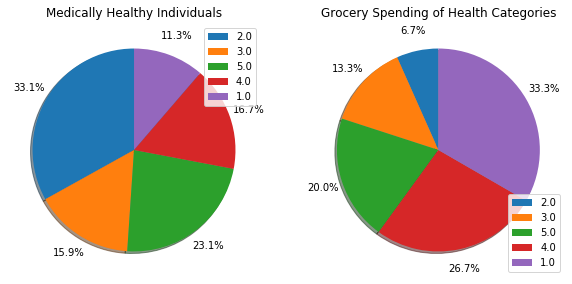

In [135]:
# Breakdown of the average health by age 

rat=metabolic_panel.groupby('health')[['grocery']].mean().reset_index()

plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.pie(rat['grocery'],autopct='%1.1f%%', startangle=90, pctdistance=1.2,shadow=True)
plt.legend(metabolic_panel['health'].unique())
plt.title('Medically Healthy Individuals')

plt.subplot(1,2,2)
plt.pie(rat['health'],autopct='%1.1f%%', startangle=90, pctdistance=1.2,shadow=True)
plt.legend(metabolic_panel['health'].unique(), loc=4)
plt.title('Grocery Spending of Health Categories')

plt.show()

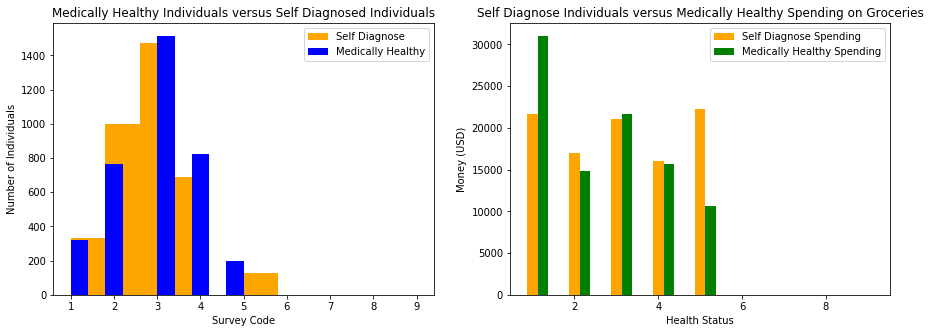

In [121]:
#Protein Results
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(metabolic_panel.self_diagnose, color='orange')
plt.hist(metabolic_panel.health, color='blue')
plt.xlabel('Survey Code')
plt.ylabel('Number of Individuals')
plt.legend(['Self Diagnose', 'Medically Healthy'])
plt.title('Medically Healthy Individuals versus Self Diagnosed Individuals')

plt.subplot(1,2,2)
plt.bar(metabolic_panel.groupby('self_diagnose')['grocery'].mean().index, metabolic_panel.groupby('self_diagnose')['grocery'].mean(), color='orange', width=.25)
plt.bar(metabolic_panel.groupby('health')['grocery'].mean().index + .25, metabolic_panel.groupby('health')['grocery'].mean(), color='green', width=.25)
plt.xlabel('Health Status')
plt.ylabel('Money (USD)')
plt.legend(['Self Diagnose Spending', 'Medically Healthy Spending'])
plt.title('Self Diagnose Individuals versus Medically Healthy Spending on Groceries')

plt.show()

Evaluating how participants viewed their own healthy and spending habits is crucial to being able to provide recommendations or alter behavior. Each graph's x axis is based on the NCHS coding convention for data analysis: 
- 1 - Excellent 
- 2 - Very Good 
- 3 - Good 
- 4 - Fair 
- 5 - Poor 
- 7 - Refused 
- 9 - Don't Know 

When interpreting "Medically Healthy Individuals versus Self Diagnose Individuals" in conjunction with "Self Diagnose Individuals versus Medically Healthy Spending on Groceries" there are several interesting points that arise: 
- The number of participants that reported excellent health correlated strongly with metabolic testing 
- The highest number of spending on groceries are attributed to individuals that have excellent health
- The survey respondents have a tendency to be overconfident in reporting good health and under-assessing poor health
- Individuals with Very Good Health and Fair health were assed on spending the same amount on groceries (about 15,000 annually)
- Individual with Poor health over assesed the amount going towards grocery spending and under assesed their overall health 
The information provided by the graphs do not imply casauation but provide an interesting insight into the correlation of different data points, primarily health and amount spent of groceries. Less than 12% of participants respondents are in excellent condition, but the total volumn of money spent on groceries by this group is close to 34%. 

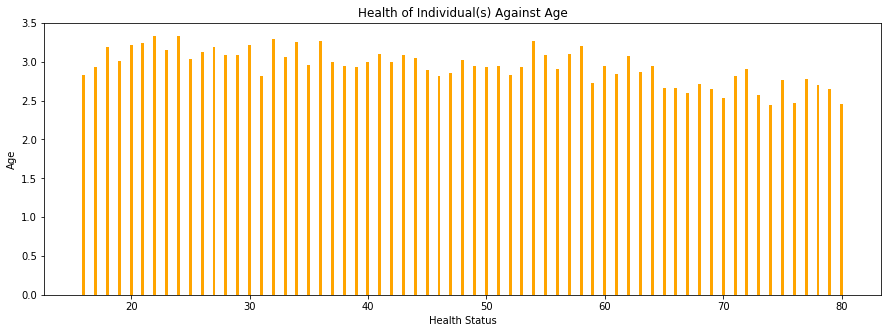

In [179]:
plt.figure(figsize=(15,5))

plt.bar(metabolic_panel.groupby('age')['health'].mean().index, metabolic_panel.groupby('age')['health'].mean(), color='orange', width=.25)
plt.xlabel('Health Status')
plt.ylabel('Age')
plt.title('Health of Individual(s) Against Age')

plt.show()

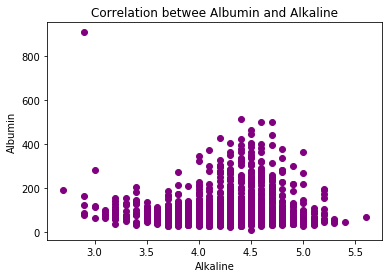

In [62]:
plt.scatter(metabolic_panel.albumin, metabolic_panel.alkaline, color='purple')
plt.xlabel('Alkaline')
plt.ylabel('Albumin')
plt.title('Correlation betwee Albumin and Alkaline')

plt.show()

### 4.3 Medication 

![](prescription-drugs2.jpg)

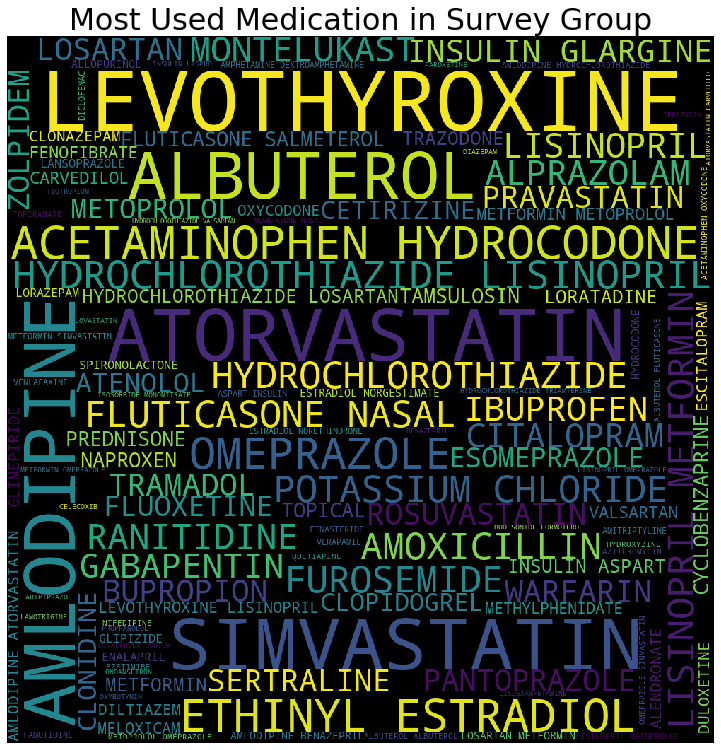

In [64]:
medications = pd.DataFrame()

medications['drug'] = meds_df['RXDDRUG'].str.replace('\d+','')
medications = medications.dropna()

plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'black', width = 1000,  height = 1000, max_words = 121).generate(' '.join(medications['drug']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Used Medication in Survey Group',fontsize = 30)
plt.show()


A visual representation of the most commonly prescribed medicine adds context to the underlying health concerns associated with the sample size of survey respondents. Medication is the reaction to an action (i.e. the identification of poor/concerning health). Evaluating the most commonly prescibed medication can add context the malnutrition or health concerns of a demographic group. The five most common medications prescribed are: 

- Amlodipine - a blood pressure medications 
- Atorvastatin - to lower blood levels of "bad" cholesterol
- Levothyrozine - used to treat/replace a hormone normally produced by the thyroid to regulate the body's energy and metabolism
- Albuterol - relaxes muscles in the airway 
- Simvastatin - used to lovwer blood levels of "bad" cholesterol 

## 5. Model Creation and Fine Tuning 

### 5.1 Data Standardization 

In [65]:
standardized_mp = pd.DataFrame()

standardized_mp ['albumin'] = labs_pd.LBXSAL
standardized_mp ['alkaline'] = labs_pd.LBXSAPSI
standardized_mp ['alt'] = labs_pd.LBXSATSI
standardized_mp ['ast'] = labs_pd.LBXSASSI
standardized_mp ['bun'] = labs_pd.LBXSBU
standardized_mp ['calcium'] = labs_pd.LBXSCA
standardized_mp ['chloride'] = labs_pd.LBXSCLSI
standardized_mp ['creatininine'] = labs_pd.LBXSCR
standardized_mp ['glucose'] = labs_pd.LBXSGL
standardized_mp ['potassium'] = labs_pd.LBXSKSI
standardized_mp ['sodium'] = labs_pd.LBXSNASI
standardized_mp ['bilirubin'] = labs_pd.LBXSTB
standardized_mp ['protein'] = labs_pd.LBXSTP

In [66]:
# Standardizing the data set because we're evaluating different units and scales
names = standardized_mp.columns

scaler = preprocessing.StandardScaler()

scaled_panel = scaler.fit_transform(standardized_mp)
scaled_panel = pd.DataFrame(scaled_panel, columns=names)

In [67]:
scaled_panel ['gender'] = demographic_df.RIAGENDR
scaled_panel ['age'] = demographic_df.RIDAGEYR
scaled_panel ['health'] = questionnaire_df.DBQ700
scaled_panel ['grocery'] = questionnaire_df.CBD070
scaled_panel ['non_grocery'] = questionnaire_df.CBD090
scaled_panel ['eating_out'] = questionnaire_df.CBD120
scaled_panel ['self_diagnose'] = questionnaire_df.HSD010

In [68]:
# Created dummy variables based on the health status 
health_dummy = pd.get_dummies(pd.DataFrame([*scaled_panel.health], index = scaled_panel.health.index).stack()).any(level=0).astype(int)

scaled_panel = pd.concat([scaled_panel,health_dummy], axis=1)

In [69]:
scaled_panel = scaled_panel.dropna()

In [70]:
scaled_panel.rename(columns={1.0:'health_excellent', 2.0:'health_very_good', 3.0:'health_good', 4.0:'health_fair', 5.0:'health_poor', 9.0:'health_idk' }, inplace=True)

In [71]:
# Created dummy variables based on the gender status 
gender_dummy = pd.get_dummies(pd.DataFrame([*scaled_panel.gender], index = scaled_panel.gender.index).stack()).any(level=0).astype(int)

scaled_panel = pd.concat([scaled_panel,gender_dummy], axis=1)
scaled_panel.rename(columns={1:'gender_male', 2:'gender_female'}, inplace=True)

In [72]:
scaled_panel.corr()

,albumin,alkaline,alt,ast,bun,calcium,chloride,creatininine,glucose,potassium,...,eating_out,self_diagnose,health_excellent,health_very_good,health_good,health_fair,health_poor,health_idk,gender_male,gender_female
albumin,1.000000,0.029594,0.076042,0.003822,-0.082102,0.506187,-0.155125,-0.085863,-0.157761,-0.011449,...,-0.005058,-0.012815,-0.006771,0.017535,-0.013809,0.005575,-0.003355,NaN,-0.002288,0.002288
alkaline,0.029594,1.000000,-0.009288,0.056400,-0.074133,0.138292,-0.006693,-0.073143,0.010051,0.072909,...,-0.000920,0.030411,-0.007323,-0.019942,0.001201,0.025949,-0.005601,NaN,0.004534,-0.004534
alt,0.076042,-0.009288,1.000000,0.673653,-0.000101,0.041987,-0.068812,0.013054,0.087750,-0.004349,...,0.037599,0.028518,-0.010754,-0.016733,-0.004805,0.011766,0.032386,NaN,0.009685,-0.009685
ast,0.003822,0.056400,0.673653,1.000000,-0.005653,0.011125,-0.076980,0.006200,0.018584,-0.003920,...,0.097890,0.023636,-0.009933,-0.017370,0.001114,0.014361,0.014755,NaN,0.001313,-0.001313
bun,-0.082102,-0.074133,-0.000101,-0.005653,1.000000,-0.017098,-0.028669,0.576462,0.157109,0.235303,...,-0.003054,-0.016817,-0.012969,0.009198,-0.003443,0.007208,-0.006179,NaN,0.022482,-0.022482
calcium,0.506187,0.138292,0.041987,0.011125,-0.017098,1.000000,-0.169395,-0.056400,-0.033152,0.139363,...,-0.021614,0.000288,-0.007397,0.016703,-0.012179,0.010374,-0.013544,NaN,0.004941,-0.004941
chloride,-0.155125,-0.006693,-0.068812,-0.076980,-0.028669,-0.169395,1.000000,-0.068924,-0.233178,0.020095,...,-0.001116,0.026222,-0.015634,-0.006111,0.017961,-0.009882,0.009825,NaN,-0.033175,0.033175
creatininine,-0.085863,-0.073143,0.013054,0.006200,0.576462,-0.056400,-0.068924,1.000000,0.094966,0.161866,...,-0.007971,-0.017799,-0.009120,0.007462,-0.000284,0.003053,-0.007065,NaN,0.002400,-0.002400
glucose,-0.157761,0.010051,0.087750,0.018584,0.157109,-0.033152,-0.233178,0.094966,1.000000,0.072737,...,0.000444,0.008822,-0.010594,0.005273,-0.030832,0.041258,-0.005508,NaN,0.035775,-0.035775
potassium,-0.011449,0.072909,-0.004349,-0.003920,0.235303,0.139363,0.020095,0.161866,0.072737,1.000000,...,0.013245,-0.021407,0.025629,0.010874,-0.014073,-0.008831,-0.004721,NaN,0.009210,-0.009210


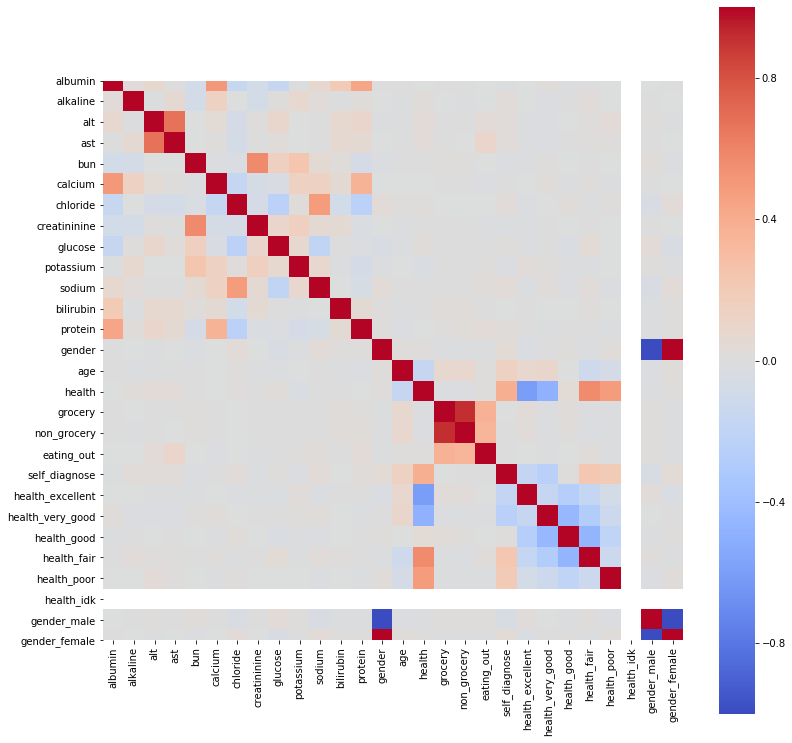

In [143]:
#Correlation Heatmap 
plt.figure()
sns.heatmap(scaled_panel.corr(), square =True, annot = False, cmap='coolwarm')

### 5.2 Predictive Modeling of Fair Health 

The first model's target is set to "fair heal". The reason for this is because because close to 40% of the survey respondents have fair or poor health. These individuals are at the highest risk for sever health complications and according to the EDA, spending equivalently the same amount as individuals with Good Health. If this assessment holds true, then changing the behaviorally/purchasing habits of the survey respondents can possibly lead to an increase of overall health. Also, setting the target of health as fair sets a health standard for individuals who are below this level, and provides an added service to individuals who may benefit the most. 

In [73]:
y = scaled_panel.health_fair

In [74]:
pre_model = pd.DataFrame()

pre_model ['alkaline'] = scaled_panel.alkaline
pre_model ['albumin'] = scaled_panel.albumin
pre_model ['alt'] = scaled_panel.alt
pre_model ['ast'] = scaled_panel.ast
pre_model ['bun'] = scaled_panel.bun
pre_model ['calcium'] = scaled_panel.calcium
pre_model ['chloride'] = scaled_panel.chloride
pre_model ['creatininine'] = scaled_panel.creatininine
pre_model ['glucose'] = scaled_panel.glucose
pre_model ['potassium'] = scaled_panel.potassium
pre_model ['sodium'] = scaled_panel.sodium
pre_model ['protein'] = scaled_panel.protein
pre_model ['grocery'] = scaled_panel.grocery
pre_model ['age'] = scaled_panel.age
pre_model ['eating_out'] = scaled_panel.eating_out

In [75]:
pre_model = sm.add_constant(pre_model)

results = sm.OLS(y,pre_model).fit()
results.summary()

c:\users\samuel.sesay\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            health_fair   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     3.869
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           6.31e-07
Time:                        19:55:45   Log-Likelihood:                -1962.2
No. Observations:                3617   AIC:                             3956.
Df Residuals:                    3601   BIC:                             4055.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3285      0.018     18.533      0.000       0.294       0.363
alkaline         0.0100      0.007      1.415      0.157      -0.004       0.024
albumin          0.0043      0.009      0.493      0.622      -0.013       0.022
alt             -0.0017      0.011     -0.146      0.884      -0.024       0.021
ast              0.0041      0.009      0.463      0.643      -0.013       0.021
bun              0.0028      0.008      0.337      0.736      -0.013       0.019
calcium         -0.0004      0.009     -0.051      0.960      -0.017       0.017
chloride        -0.0081      0.009     -0.931      0.352      -0.025       0.009
creatininine    -0.0017      0.008     -0.224      0.823      -0.017       0.013
glucose          0.0198      0.008      2.577      0.010       0.005       0.035
potassium       -0.0079      0.007     -1.077      0.281      -0.022       0.007
sodium           0.0188      0.008      2.228      0.026       0.002       0.035
protein         -0.0029      0.008     -0.362      0.717      -0.019       0.013
grocery      -5.512e-08    5.6e-08     -0.985      0.325   -1.65e-07    5.46e-08
age             -0.0022      0.000     -6.183      0.000      -0.003      -0.002
eating_out    7.958e-08   4.84e-08      1.643      0.100   -1.54e-08    1.75e-07
==============================================================================
Omnibus:                      624.280   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              981.305
Skew:                           1.267   Prob(JB):                    8.17e-214
Kurtosis:                       2.692   Cond. No.                     4.46e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The predictive model of fair health is created and should be tested against a test set. This will help susbtantiate if the model foundation can be used for future iteration and fine tuning of the predictive model. 

### Testing the Model 

In [76]:
#Creating the training and test set of data and applying it to the first model 
X_train, X_test, y_train, y_test = train_test_split(pre_model, y, test_size = 0.2, random_state = 465)

# We fit an OLS model using statsmodels
results_train = sm.OLS(y_train, X_train).fit()

results_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            health_fair   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.217
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           2.58e-05
Time:                        19:55:50   Log-Likelihood:                -1571.8
No. Observations:                2893   AIC:                             3176.
Df Residuals:                    2877   BIC:                             3271.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3320      0.020     16.811      0.000       0.293       0.371
alkaline         0.0058      0.008      0.750      0.454      -0.009       0.021
albumin          0.0038      0.010      0.383      0.702      -0.016       0.023
alt             -0.0104      0.013     -0.829      0.407      -0.035       0.014
ast              0.0100      0.009      1.069      0.285      -0.008       0.028
bun             -0.0023      0.009     -0.247      0.805      -0.021       0.016
calcium         -0.0054      0.010     -0.564      0.573      -0.024       0.013
chloride        -0.0129      0.010     -1.350      0.177      -0.032       0.006
creatininine     0.0007      0.008      0.080      0.936      -0.015       0.017
glucose          0.0185      0.008      2.203      0.028       0.002       0.035
potassium       -0.0073      0.008     -0.893      0.372      -0.023       0.009
sodium           0.0201      0.009      2.155      0.031       0.002       0.038
protein         -0.0033      0.009     -0.358      0.721      -0.021       0.015
grocery       -6.46e-08    6.5e-08     -0.993      0.321   -1.92e-07    6.29e-08
age             -0.0023      0.000     -5.695      0.000      -0.003      -0.001
eating_out    6.563e-08   5.26e-08      1.247      0.213   -3.76e-08    1.69e-07
==============================================================================
Omnibus:                      498.285   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              778.285
Skew:                           1.260   Prob(JB):                    9.94e-170
Kurtosis:                       2.680   Cond. No.                     4.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
predictions = results_train.predict(X_test)
error = y - predictions
bart_stats = bartlett (predictions, error)

print('Bartlett Results are: {}'.format(bart_stats))

Bartlett Results are: BartlettResult(statistic=2262.0009998825417, pvalue=0.0)


In [78]:
metrics.mean_absolute_error(y_test, predictions)

0.34606073814064287

In [79]:
print('Accuracy Score : ' + str(accuracy_score(y_test,predictions.round())))
print('Precision Score : ' + str(precision_score(y_test,predictions.round())))

Accuracy Score : 0.7748618784530387
Precision Score : 0.0


c:\users\samuel.sesay\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the predictive model some of information that be statistically supported. The statistically proven factors include: 
- The adjusted R squared shows the the first models can explain 2% of the target data; the explanatory variables selected can only explain that porportion of the target data 
- The p value of the F stastitics indicates that our model is statistically relevent; we call reject the hull hypothesis that our model predicts values better than the mean value (i.e. a featureless model)

Viewing these two factors in isolation can allude to the promising burdgeoning of a model with predictive capabalities for fair health. However, when looking at the coefficient analysis, the entirety of the picture comes into sharp acuity. All the components of the metabolic panel have a p value of the t statistics  higher than .05 with the exception of glucose, sodium, and age: 
- Glucose has a p value of .010 but a coefficient of .0198
- Sodium has a p value of .026 and a coefficient of .0188 
- Age has a p value 0 and a coefficient of -.0222

The negative coefficient for age add's to the credibility of the model due to the fact that as individuals grow older, they are more susceptible to illness and bodily health requires more attention. However the coefficients for glucose and sodium are small and can play a nominal factors to overall health of an individual. This predictive model is skewed 1.267 with a low Jarque-Bera probability. This lets us know that heteroscadisticity exists within the data set we are using. 

When the model is tested with a training sample, we can see that the model performs essentially the same with a nominal decrease in the R squared adjusted of .01. The alludes to the consitency in the model, albiet it is underfitting of the data, which requires reassment of the model. This is supported by the Accurary Score of 77% bue a Precision Score of 0. Based on the information provided, a second model will be tested against this first model that omit variables with negligble coefficients but considers other featuers with higher correlational values to good health instead of fair.

### 5.3 Predictive Modeling of Good Health 

In [147]:
pre_model_good = pd.DataFrame()

pre_model_good ['glucose'] = scaled_panel.glucose
pre_model_good ['sodium'] = scaled_panel.sodium
pre_model_good ['age'] = scaled_panel.age
pre_model_good ['eating_out'] = scaled_panel.eating_out


In [148]:
y_good = scaled_panel.health_good

In [149]:
pre_model_good = sm.add_constant(pre_model_good)

results = sm.OLS(y_good,pre_model_good).fit()
results.summary()

c:\users\samuel.sesay\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            health_good   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.453
Date:                Sat, 18 Apr 2020   Prob (F-statistic):              0.214
Time:                        00:00:52   Log-Likelihood:                -2573.7
No. Observations:                3617   AIC:                             5157.
Df Residuals:                    3612   BIC:                             5188.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4245      0.021     20.273      0.000       0.383       0.466
glucose       -0.0182      0.009     -2.118      0.034      -0.035      -0.001
sodium        -0.0126      0.008     -1.503      0.133      -0.029       0.004
age           -0.0001      0.000     -0.332      0.740      -0.001       0.001
eating_out   1.06e-09   5.27e-08      0.020      0.984   -1.02e-07    1.04e-07
==============================================================================
Omnibus:                    13677.522   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              600.998
Skew:                           0.329   Prob(JB):                    3.13e-131
Kurtosis:                       1.114   Cond. No.                     4.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Testing the Model

In [150]:
#Creating the training and test set of data and applying it to the first model 
X_train, X_test, y_train, y_test = train_test_split(pre_model_good, y_good, test_size = 0.2, random_state = 465)

# We fit an OLS model using statsmodels
results_train_good = sm.OLS(y_train, X_train).fit()

results_train_good.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            health_good   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.664
Date:                Sat, 18 Apr 2020   Prob (F-statistic):              0.156
Time:                        00:01:21   Log-Likelihood:                -2058.9
No. Observations:                2893   AIC:                             4128.
Df Residuals:                    2888   BIC:                             4158.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4279      0.023     18.368      0.000       0.382       0.474
glucose       -0.0239      0.009     -2.528      0.012      -0.042      -0.005
sodium        -0.0071      0.009     -0.768      0.443      -0.025       0.011
age           -0.0002      0.000     -0.379      0.705      -0.001       0.001
eating_out -1.653e-08   5.72e-08     -0.289      0.772   -1.29e-07    9.56e-08
==============================================================================
Omnibus:                    11000.704   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              479.600
Skew:                           0.322   Prob(JB):                    7.18e-105
Kurtosis:                       1.112   Cond. No.                     4.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [151]:
predictions_good = results_train_good.predict(X_test)
error = y_good - predictions
bart_stats = bartlett (predictions_good, error)

print('Bartlett Results are: {}'.format(bart_stats))

Bartlett Results are: BartlettResult(statistic=3742.94747912969, pvalue=0.0)


In [152]:
metrics.mean_absolute_error(y_test, predictions_good)

0.4861974856923164

The fourth iteration of the model did poorly when the target is is good health. Based on the F statistic the current model isn't different from a featureless model and the null hypothesis isn't rejected. The adjusted R squared is .001 which implies that .01% of the data can be explained by the models features. The p values for the t test reject all coeffiencents except for glucose. This point is quite interesting because these same features contributed to a "fair" health categorization, but not a "good" health categorization. This alludes to other fators contributing to fair and good health, outside of the features selected. Due to this, the data is viewed using unsupervised techniques to better understand the centroid data points across the various data sets.  

### 5.4 Dendogram Modeling 

In [160]:
pca = PCA (n_components=5)
pca_results = pca.fit_transform(scaled_panel)

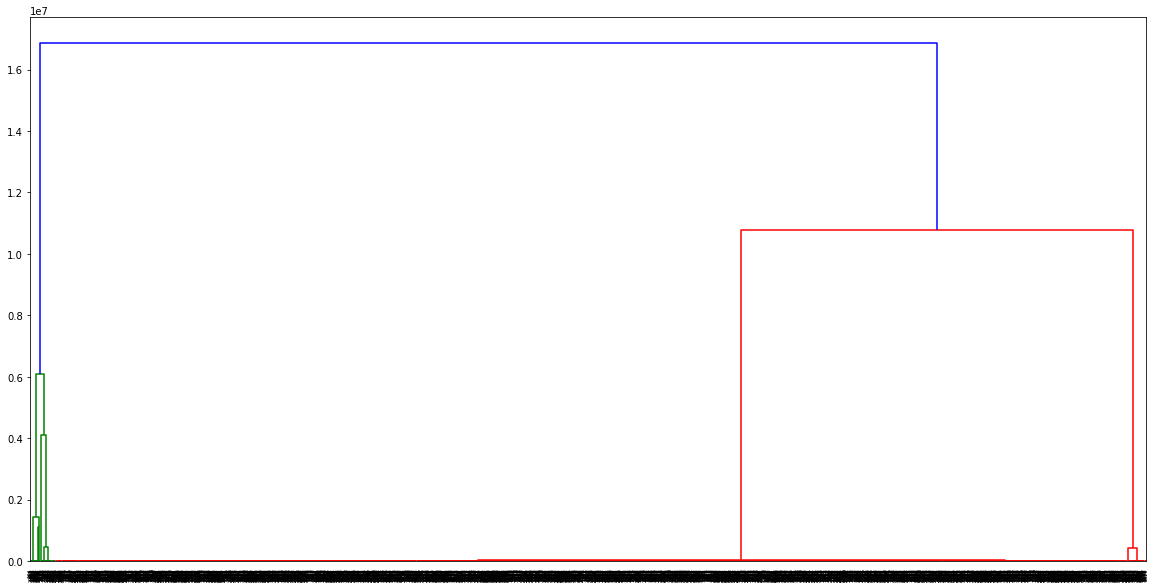

In [161]:
plt.figure(figsize=(20,10))
dendrogram(linkage(pca_results, method='ward'))
plt.show()

In [170]:
#Agglomerative Ward 
agg_cluster = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=3 )
clusters = agg_cluster.fit_predict(scaled_panel)

In [171]:
clusters = np.array([0 if x == 1 else 1 if x==0 else 2 for x in clusters])
pd.crosstab(y_good,clusters)

col_0,0,1,2
health_good,,,
0.0,36,44,2023
1.0,24,37,1453


## 6. Recommender System
The Recommender system is tool that can be used and accessible for any socio-economic level, customized to provide a unique experience to each person based on their financial and environmental constraints. It serves as a dual purpose to provide guidance to individuals seeking customized health advice, without the financial contraints of the health/medical system and its constraints. In order to create the recommendation systems, several method have to be created that incorporate data from the predictive model, metabolic panel, and country goods basket. 

### 6.1 Method(s) Definition(s) 

In [89]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values
    
    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

Resumetable is a method that provides an overall analysis of the data table that is being passed to the method, by adding additional columns to summarize the data. 

In [155]:
def checkHealth(df):
    data = [{'alkaline':0,'albumin':0,'alt':0, 'ast':0,'bun':0,'calcium':0,'chloride':0,'creatininine':0,
                                        'glucose':0, 'potassium':0, 'sodium':0, 'bilirubin':0, 'protein':0}]
    results_df = pd.DataFrame(data)
    
    #Alkaline 
    alk_low = 44
    alk_high = 147
    
    if (alk_low <= df.alkaline.values) and (alk_high >= df.alkaline.values):
        results_df ['alkaline'] = 1
        
    #Albumin
    alb_low = 3.9
    alb_high = 5.0
    
    if (alb_low <= df.albumin.values) and (alb_high >= df.albumin.values):
        results_df ['albumin'] = 1
    
    #Alt
    alt_low = 8
    alt_high = 37
    
    if (alt_low <= df.alt.values) and (alt_high >= df.alt.values):
        results_df ['alt'] = 1
        
    #Ast 
    ast_low = 10
    ast_high = 34
    
    if (ast_low <= df.ast.values) and (ast_high >= df.ast.values):
        results_df ['ast'] = 1
        
    #Bun
    bun_low = 7
    bun_high = 20
    
    if (bun_low <= df.bun.values) and (bun_high >= df.bun.values):
        results_df ['bun'] = 1
        
    #Calcium
    calcium_low = 8.5
    calcium_high = 10.9
    
    if (calcium_low <= df.calcium.values) and (calcium_high >= df.calcium.values):
        results_df ['calcium'] = 1
    
    #Chloride
    chloride_low = 96
    chloride_high = 106
    
    if (chloride_low <= df.chloride.values) and (chloride_high >= df.chloride.values):
        results_df ['chloride'] = 1
    
    #Creatininine 
    crea_low = .7
    crea_high = 1.3
    
    if (crea_low <= df.creatininine.values) and (crea_high >= df.creatininine.values):
        results_df ['creatininine'] = 1
    
    #Glucose
    glu_low = 70
    glu_high = 100
    
    if (glu_low <= df.glucose.values) and (glu_high >= df.glucose.values):
        results_df ['glucose'] = 1
    
    #Potassium
    pot_low = 3.7
    pot_high = 5.2
    
    if (pot_low <= df.potassium.values) and (pot_high >= df.potassium.values):
        results_df ['potassium'] = 1
    
    #Sodium 
    sod_low = 136
    sod_high = 144
    
    if (sod_low <= df.sodium.values) and (sod_high >= df.sodium.values):
        results_df ['sodium'] = 1
    
    #Bilirubin
    bil_low = .2
    bil_high = 1.9
    
    if (bil_low <= df.bilirubin.values) and (bil_high >= df.bilirubin.values):
        results_df ['bilirubin'] = 1
    
    #Protein 
    protein_low = 6.3
    protein_high = 7.9
    
    if (protein_low <= df.protein.values) and (protein_high >= df.protein.values):
        results_df ['protein'] = 1
    
    
    return results_df

The checkHealth Method evaluates the users metabolic panel against the present range of health indicactos and returns a 0 for unhealthy or a 1 for healthy, specifically to the metabolic panel. 

In [91]:
def healthConcerns(df):
    concerns_df = pd.DataFrame(columns=['problem_health'])
    
    for col in df:
        for val in df [col]:
            if val == 0:
                #print('Health Concern: {}'.format(col.capitalize()))
                concerns_df = concerns_df.append({'problem_health':col}, ignore_index=True)
                
                
    return concerns_df
    

healthConcern method accepts a dataframe of the users metabolic panel and returns a dataframe of only the components that are labeled unhealthy or 0. 

In [92]:
def recommendFood(panel_df,basket_df):
    
    for mb in panel_df.problem_health:
        for food in basket_df.type:
            if mb == food:
                print('The current {} level is a health concern. The suggested food is: {}. Priced at {} GNF'.format(mb,str(basket_df.loc[basket_df['type']== mb].food.values).strip('[]'),int(basket_df.loc[basket_df['type']== mb].price.values)))
                    #print('')

Based on the country basket of goods created, and the users metabolic panel, the recommendFood method offers suggestion of goods and their prices for individuals afflicted by a malnutrition. 

### 6.2 Testing the Recommender

Below provides an example of three users with good, poor, and fair health via a metabolic panel. Based on this information, the recommender suggest goods and their prices for a developing country. 

In [93]:
poor = [{'alkaline': 0,'albumin':0,'alt':0, 'ast':0,'bun':0,'calcium':0,'chloride':0,'creatininine':0,
                                        'glucose':0, 'potassium':0, 'sodium':0, 'bilirubin':0, 'protein':0}]

good = [{'alkaline': 80,'albumin':4,'alt':22, 'ast':22,'bun':10,'calcium':9.2,'chloride':100,'creatininine':1.0,
             
         'glucose':80, 'potassium':4.0, 'sodium':140, 'bilirubin':1.0, 'protein':7.0}]

mixed = [{'alkaline': 0,'albumin':4.0,'alt':2, 'ast':22,'bun':1,'calcium':9.2,'chloride':10,'creatininine':1.0,
                                        'glucose':8, 'potassium':4.0, 'sodium':14, 'bilirubin':1.0, 'protein':2.0}]


data =[['alkaline','Lettuce',20],['albumin','Eggs',80],['alt','Oil (Palm)',54],['ast','Sorghum (white)',47],['bun','Fish',35]
        ,['calcium','Rice (local)',5],['chloride','Tomatoes',18],['creatininine','Onions',15],['glucose','Bread',33],['potassium','Spinach',20]
          ,['sodium','Beef',50],['bilirubin','Liver Damage',0],['protein','Beef',50]]

food_basket = pd.DataFrame(data, columns=['type','food','price'])

healthy_df = pd.DataFrame(good)
notHealthy_df = pd.DataFrame(poor)
mixHealth_df = pd.DataFrame(mixed)

In [94]:
user_panel = checkHealth(mixHealth_df)

print(user_panel)
print(healthConcerns(user_panel))

   albumin  alkaline  alt  ast  bilirubin  bun  calcium  chloride  \
0        1         0    0    1          1    0        1         0   

   creatininine  glucose  potassium  protein  sodium  
0             1        0          1        0       0  
  problem_health
0       alkaline
1            alt
2            bun
3       chloride
4        glucose
5        protein
6         sodium


In [95]:
panel_results = healthConcerns(user_panel)

recommendFood(panel_results, food_basket)

The current alkaline level is a health concern. The suggested food is: 'Lettuce'. Priced at 20 GNF
The current alt level is a health concern. The suggested food is: 'Oil (Palm)'. Priced at 54 GNF
The current bun level is a health concern. The suggested food is: 'Fish'. Priced at 35 GNF
The current chloride level is a health concern. The suggested food is: 'Tomatoes'. Priced at 18 GNF
The current glucose level is a health concern. The suggested food is: 'Bread'. Priced at 33 GNF
The current protein level is a health concern. The suggested food is: 'Beef'. Priced at 50 GNF
The current sodium level is a health concern. The suggested food is: 'Beef'. Priced at 50 GNF


## 7. Summary 

### 7.1 Quantifiable Results 

Intially the project's attempt to create a recommendation systems was highly ambitious. Once the preliminary research was finalized it became apparent that quanitifying health is somewhat of a monumental tasks. There are various factors that have to be considered, outside of environmental. Theses factors include age, sex, ethnicity, body mass index (BMI), genealogy, and various factors. For the sake of this project, several standards of health had to set, including the average BMI, health range of the metabolic panel for males, discounting genealogy, and the mean value of age.  

The data set was able to provide a lot of information;  regarding how the survey participants self viewed their health, in contrast to the actuality, grocery spending habits of individuals in various health categories, outlier percentage of individuals for the various metabolic panels, age of health of users, and leading medicinal drug prescribed. More importantly this project was able to educated on the factors that do not attriubute to fair or good health, however may be correlational. One thing that was ascertained was the correlaiton of spending habits of individuals evaluated at excellent health. However, when evaluating these factors against a good health, they appeared to be mininimally contributing factors. This information was supported by looking at a correlation analysis of the possible features and the model target, and all of the correlation coefficients were minimals; thus alluding to the model requiring more additional features that were not considerd in the scope of this project. 

The third approach considered looking the data in an unsupervised manner; instead of highlighting specific features, an unsupervised methodology would allow the data to speak for itself by identifying specific centroids within the data set via the dendrogram of the scaled data set. The dendogram highlighted three clusters of data, supporting the second predictive model. However, under additional scrutiny of the crosstab analysis, the data's proficiency in categorizing the data was less than ideal. Once again alluding to features outside the data set contributing the health categorization of the survey participants.

Albeit with the limitations defined on this project; the recommendation system can be used to instruct individuals of goods and prices in their immediate market. These good can in turn affect the populaces overall healthy; and reinforces the fact that a healthy metabolic panel isn't the only indicator for excellent health. 

![](healthy_body.jpg)

### 7.2 Next Steps 

The next steps require improving upon the model, enhancing the recommedation system, and allowing for flexibility in defining the unique/specific criteria of good health. This includes: 
- The best predictive model can only explain 16% of the a fair health status, and less for good. A deeper dive is required with expansive features to understand the impact of these factors 
- Improving on the F Statistic p value for the model via combination of all the survey material 
- The current predictive models is for a specific and unique subset of individuals (i.e. males, with an average BMI, Caucausin ethnicitiy, and socio-economic level). The predicitve model needs to reflect and consider individuals on a global scale, such as various ethnicities, sex, environment, etc.  
- Remodel the recommender to identify a basket of goods via direct user input
- Amend the recommender to include users that are currently using medication 
- Accepts a budget by the user and mazimixes a basket of goods conducive to the health and budgetary constraints of the users 


# Thank You 